<a href="https://colab.research.google.com/github/DeBanner/Data-Science/blob/main/BrightestStudents_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import requests
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
url = 'https://brighteststudents.com/top-81-result'


response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')

In [79]:
tables = pd.read_html('/content/drive/MyDrive/Colab Notebooks/Brightest.html')

In [80]:
len(tables)

1

In [81]:
brightest = tables[0]
brightest

,Candidate Name,School Name,State,R1 Score,R2 Score,Status
0,IBRAHIM SAFIYAL,BOFOAT MODEL INTERNATIONAL COLLEGE,ONDO,82,90,NATIONAL QUALIFIED
1,AKINKUNMI IREOLUWA,BRIGHT MINDS COLLEGE,LAGOS,78,78,NATIONAL QUALIFIED
2,SUDOR WILSON,DEEPER LIFE HIGH SCHOOL UYO,AKWA IBOM,74,76,NATIONAL QUALIFIED
3,BELLO OLADAYO,EASYWAY INTERNATIONAL MODEL COLLEGE,OGUN,84,80,NATIONAL QUALIFIED
4,ONYEBUCHI PRECIOUS,EPE GIRLS' SENIOR HIGH SCHOOL,LAGOS,78,86,NATIONAL QUALIFIED
...,...,...,...,...,...,...
88,OFOJINDU EMMANUEL,MARIST BROTHER` JUNIORATE,ABIA STATE,80,76,STATE QUALIFIED
89,ANEKWE EMEKA,CSMT SCHOOLS ABAKALIKI,EBONYI,72,-,STATE QUALIFIED
90,AJIH OKEZIE,"MARIST COLLEGE YANGOJI, ABUJ",ABUJA,76,62,STATE QUALIFIED
91,MUHAMMED HANIFAT,NIGERIAN TULIP INTERNATIONAL COLLEGES KANO BOYS,KANO,72,-,STATE QUALIFIED


In [82]:
qual= brightest[brightest['Status'] != 'NOT QUALIFIED']
qual

,Candidate Name,School Name,State,R1 Score,R2 Score,Status
0,IBRAHIM SAFIYAL,BOFOAT MODEL INTERNATIONAL COLLEGE,ONDO,82,90,NATIONAL QUALIFIED
1,AKINKUNMI IREOLUWA,BRIGHT MINDS COLLEGE,LAGOS,78,78,NATIONAL QUALIFIED
2,SUDOR WILSON,DEEPER LIFE HIGH SCHOOL UYO,AKWA IBOM,74,76,NATIONAL QUALIFIED
3,BELLO OLADAYO,EASYWAY INTERNATIONAL MODEL COLLEGE,OGUN,84,80,NATIONAL QUALIFIED
4,ONYEBUCHI PRECIOUS,EPE GIRLS' SENIOR HIGH SCHOOL,LAGOS,78,86,NATIONAL QUALIFIED
...,...,...,...,...,...,...
88,OFOJINDU EMMANUEL,MARIST BROTHER` JUNIORATE,ABIA STATE,80,76,STATE QUALIFIED
89,ANEKWE EMEKA,CSMT SCHOOLS ABAKALIKI,EBONYI,72,-,STATE QUALIFIED
90,AJIH OKEZIE,"MARIST COLLEGE YANGOJI, ABUJ",ABUJA,76,62,STATE QUALIFIED
91,MUHAMMED HANIFAT,NIGERIAN TULIP INTERNATIONAL COLLEGES KANO BOYS,KANO,72,-,STATE QUALIFIED


In [83]:
qual['R1 Score'].dtypes

dtype('int64')

In [84]:
qual['R2 Score'].dtypes

dtype('O')

In [85]:
qual['R2 Score'] = pd.to_numeric(qual['R2 Score'], errors= 'coerce')
qual

<ipython-input-85-7127eb62700e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qual['R2 Score'] = pd.to_numeric(qual['R2 Score'], errors= 'coerce')


,Candidate Name,School Name,State,R1 Score,R2 Score,Status
0,IBRAHIM SAFIYAL,BOFOAT MODEL INTERNATIONAL COLLEGE,ONDO,82,90.0,NATIONAL QUALIFIED
1,AKINKUNMI IREOLUWA,BRIGHT MINDS COLLEGE,LAGOS,78,78.0,NATIONAL QUALIFIED
2,SUDOR WILSON,DEEPER LIFE HIGH SCHOOL UYO,AKWA IBOM,74,76.0,NATIONAL QUALIFIED
3,BELLO OLADAYO,EASYWAY INTERNATIONAL MODEL COLLEGE,OGUN,84,80.0,NATIONAL QUALIFIED
4,ONYEBUCHI PRECIOUS,EPE GIRLS' SENIOR HIGH SCHOOL,LAGOS,78,86.0,NATIONAL QUALIFIED
...,...,...,...,...,...,...
88,OFOJINDU EMMANUEL,MARIST BROTHER` JUNIORATE,ABIA STATE,80,76.0,STATE QUALIFIED
89,ANEKWE EMEKA,CSMT SCHOOLS ABAKALIKI,EBONYI,72,NaN,STATE QUALIFIED
90,AJIH OKEZIE,"MARIST COLLEGE YANGOJI, ABUJ",ABUJA,76,62.0,STATE QUALIFIED
91,MUHAMMED HANIFAT,NIGERIAN TULIP INTERNATIONAL COLLEGES KANO BOYS,KANO,72,NaN,STATE QUALIFIED


In [86]:
qual['Avg Score'] = qual[['R1 Score', 'R2 Score']].mean(axis=1, skipna= True)
qual

<ipython-input-86-2344201784f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qual['Avg Score'] = qual[['R1 Score', 'R2 Score']].mean(axis=1, skipna= True)


,Candidate Name,School Name,State,R1 Score,R2 Score,Status,Avg Score
0,IBRAHIM SAFIYAL,BOFOAT MODEL INTERNATIONAL COLLEGE,ONDO,82,90.0,NATIONAL QUALIFIED,86.0
1,AKINKUNMI IREOLUWA,BRIGHT MINDS COLLEGE,LAGOS,78,78.0,NATIONAL QUALIFIED,78.0
2,SUDOR WILSON,DEEPER LIFE HIGH SCHOOL UYO,AKWA IBOM,74,76.0,NATIONAL QUALIFIED,75.0
3,BELLO OLADAYO,EASYWAY INTERNATIONAL MODEL COLLEGE,OGUN,84,80.0,NATIONAL QUALIFIED,82.0
4,ONYEBUCHI PRECIOUS,EPE GIRLS' SENIOR HIGH SCHOOL,LAGOS,78,86.0,NATIONAL QUALIFIED,82.0
...,...,...,...,...,...,...,...
88,OFOJINDU EMMANUEL,MARIST BROTHER` JUNIORATE,ABIA STATE,80,76.0,STATE QUALIFIED,78.0
89,ANEKWE EMEKA,CSMT SCHOOLS ABAKALIKI,EBONYI,72,NaN,STATE QUALIFIED,72.0
90,AJIH OKEZIE,"MARIST COLLEGE YANGOJI, ABUJ",ABUJA,76,62.0,STATE QUALIFIED,69.0
91,MUHAMMED HANIFAT,NIGERIAN TULIP INTERNATIONAL COLLEGES KANO BOYS,KANO,72,NaN,STATE QUALIFIED,72.0


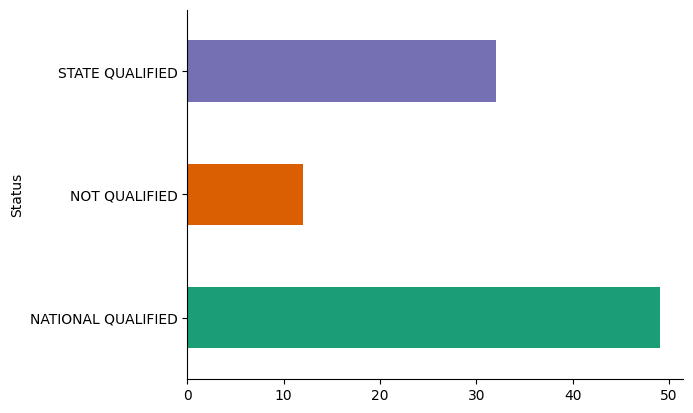

In [87]:
brightest.groupby('Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [88]:
cats = [40, 50, 60, 70, 80, 90, 100]
qual['scorerange'] = pd.cut(qual['Avg Score'], bins= cats, labels = ['40-50', '51-60','61-70', '71-80', '81-90', '91-100'], include_lowest=True)
qual

<ipython-input-88-f29b5bd1a8a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qual['scorerange'] = pd.cut(qual['Avg Score'], bins= cats, labels = ['40-50', '51-60','61-70', '71-80', '81-90', '91-100'], include_lowest=True)


,Candidate Name,School Name,State,R1 Score,R2 Score,Status,Avg Score,scorerange
0,IBRAHIM SAFIYAL,BOFOAT MODEL INTERNATIONAL COLLEGE,ONDO,82,90.0,NATIONAL QUALIFIED,86.0,81-90
1,AKINKUNMI IREOLUWA,BRIGHT MINDS COLLEGE,LAGOS,78,78.0,NATIONAL QUALIFIED,78.0,71-80
2,SUDOR WILSON,DEEPER LIFE HIGH SCHOOL UYO,AKWA IBOM,74,76.0,NATIONAL QUALIFIED,75.0,71-80
3,BELLO OLADAYO,EASYWAY INTERNATIONAL MODEL COLLEGE,OGUN,84,80.0,NATIONAL QUALIFIED,82.0,81-90
4,ONYEBUCHI PRECIOUS,EPE GIRLS' SENIOR HIGH SCHOOL,LAGOS,78,86.0,NATIONAL QUALIFIED,82.0,81-90
...,...,...,...,...,...,...,...,...
88,OFOJINDU EMMANUEL,MARIST BROTHER` JUNIORATE,ABIA STATE,80,76.0,STATE QUALIFIED,78.0,71-80
89,ANEKWE EMEKA,CSMT SCHOOLS ABAKALIKI,EBONYI,72,NaN,STATE QUALIFIED,72.0,71-80
90,AJIH OKEZIE,"MARIST COLLEGE YANGOJI, ABUJ",ABUJA,76,62.0,STATE QUALIFIED,69.0,61-70
91,MUHAMMED HANIFAT,NIGERIAN TULIP INTERNATIONAL COLLEGES KANO BOYS,KANO,72,NaN,STATE QUALIFIED,72.0,71-80


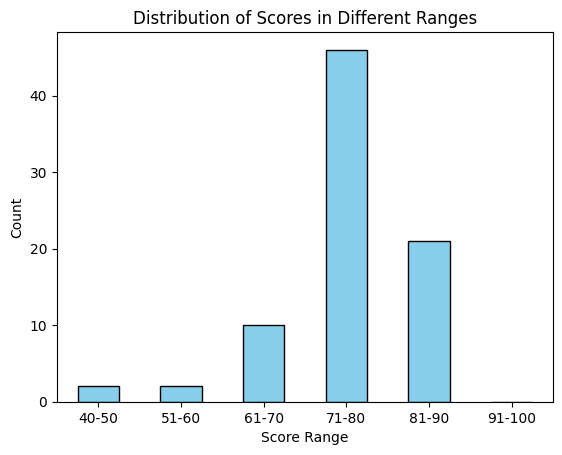

In [89]:
vcounts = qual['scorerange'].value_counts().sort_index()
vcounts.plot(kind='bar', rot=0, color='skyblue', edgecolor='black')
plt.xlabel('Score Range')
plt.ylabel('Count')
plt.title('Distribution of Scores in Different Ranges');

In [90]:
sorting1 = qual.sort_values(by='R1 Score', ascending= False).reset_index(drop=True)
sorting1.index = sorting1.index + 1
sorting1

,Candidate Name,School Name,State,R1 Score,R2 Score,Status,Avg Score,scorerange
1,SHALLOM OKWUDILI,HERITREATS PRIVATE SECONDARY SCHOOL,OGUN,94,84.0,NATIONAL QUALIFIED,89.0,81-90
2,MERCY ONASANYA,HERITREATS PRIVATE SECONDARY SCHOOL,OGUN,90,84.0,NATIONAL QUALIFIED,87.0,81-90
3,ADEJUMO NOHEEMOT,ADEDOKUN INTERNATIONAL SCHOOL (ILOYE),OGUN,88,86.0,NATIONAL QUALIFIED,87.0,81-90
4,AKEREJOLA ESOMANOSI,GREATER TOMORROW INTERNATIONAL COLLEGE,ONDO,86,86.0,NATIONAL QUALIFIED,86.0,81-90
5,OLUWARONBI DAVID,CHRIST THE REDEEMER SECONDARY SCHOOL ONDO,ONDO,86,74.0,STATE QUALIFIED,80.0,71-80
...,...,...,...,...,...,...,...,...
77,HAMEEDAT SANUSI,ABOKIN SARKI ISLAMIYYA SCHOOL,TARABA,64,NaN,STATE QUALIFIED,64.0,61-70
78,ABDURRAHMAN ABBA,ANNOOR INTERNATIONAL ISLAMIC ACADEMY BAUCHI,BAUCHI,60,NaN,STATE QUALIFIED,60.0,51-60
79,ABDULLAHI IMRANA,AL-HIKMA BASIC EDUCATION,KEBBI,54,NaN,STATE QUALIFIED,54.0,51-60
80,HABIBA DAUDA,JOY ACADEMY,GOMBE,42,NaN,STATE QUALIFIED,42.0,40-50


In [104]:
path = '/content/drive/MyDrive/Colab Notebooks/Brighest.xlsx'

with pd.ExcelWriter (path) as writer:
  sorting1.to_excel(excel_writer= writer, sheet_name= 'R1_order')


In [98]:
sorting1.to_excel('/content/drive/MyDrive/Colab Notebooks/Brighest2.xlsx')

In [105]:
sorting2 = qual.sort_values(by=['R2 Score'], ascending= False).reset_index(drop=True)
sorting2.index = sorting2.index + 1
sorting2

,Candidate Name,School Name,State,R1 Score,R2 Score,Status,Avg Score,scorerange
1,IBRAHIM SAFIYAL,BOFOAT MODEL INTERNATIONAL COLLEGE,ONDO,82,90.0,NATIONAL QUALIFIED,86.0,81-90
2,JOSEPH MARVELLOUS,GOD'S FOUNDATION GLOBAL SCHOOL,ONDO,74,90.0,NATIONAL QUALIFIED,82.0,81-90
3,SANNI RUKOYAH,EKO AKETE SENIOR GRAMMAR SCHOOL,LAGOS,78,88.0,NATIONAL QUALIFIED,83.0,81-90
4,JOAN HARUNA,GIFTED PRIME SCHOOL SABON WUSE,NIGER,80,86.0,NATIONAL QUALIFIED,83.0,81-90
5,AKEREJOLA ESOMANOSI,GREATER TOMORROW INTERNATIONAL COLLEGE,ONDO,86,86.0,NATIONAL QUALIFIED,86.0,81-90
...,...,...,...,...,...,...,...,...
77,OHAEGBU CHISOM,CHOSEN INTERNATIONAL SECONDARY SCHOOL MGBIDI,IMO,68,NaN,STATE QUALIFIED,68.0,61-70
78,ANUMBA EKENE,SAINT PAUL'S ACADEMY JOS,PLATEAU,66,NaN,STATE QUALIFIED,66.0,61-70
79,PASCAL OCHECHUKWU,TOWER OF IVORY SCHOOL,AKWA IBOM,68,NaN,STATE QUALIFIED,68.0,61-70
80,ANEKWE EMEKA,CSMT SCHOOLS ABAKALIKI,EBONYI,72,NaN,STATE QUALIFIED,72.0,71-80


In [106]:
path = '/content/drive/MyDrive/Colab Notebooks/Brighest.xlsx'

with pd.ExcelWriter (path) as writer:
  sorting2.to_excel(excel_writer= writer, sheet_name= 'R2_order')


In [107]:
sorting3 = qual.sort_values(by=['Avg Score'], ascending= False).reset_index(drop=True)
sorting3.index = sorting3.index + 1
sorting3

,Candidate Name,School Name,State,R1 Score,R2 Score,Status,Avg Score,scorerange
1,SHALLOM OKWUDILI,HERITREATS PRIVATE SECONDARY SCHOOL,OGUN,94,84.0,NATIONAL QUALIFIED,89.0,81-90
2,ADEJUMO NOHEEMOT,ADEDOKUN INTERNATIONAL SCHOOL (ILOYE),OGUN,88,86.0,NATIONAL QUALIFIED,87.0,81-90
3,MERCY ONASANYA,HERITREATS PRIVATE SECONDARY SCHOOL,OGUN,90,84.0,NATIONAL QUALIFIED,87.0,81-90
4,IBRAHIM SAFIYAL,BOFOAT MODEL INTERNATIONAL COLLEGE,ONDO,82,90.0,NATIONAL QUALIFIED,86.0,81-90
5,AKEREJOLA ESOMANOSI,GREATER TOMORROW INTERNATIONAL COLLEGE,ONDO,86,86.0,NATIONAL QUALIFIED,86.0,81-90
...,...,...,...,...,...,...,...,...
77,HAMEEDAT SANUSI,ABOKIN SARKI ISLAMIYYA SCHOOL,TARABA,64,NaN,STATE QUALIFIED,64.0,61-70
78,ABDURRAHMAN ABBA,ANNOOR INTERNATIONAL ISLAMIC ACADEMY BAUCHI,BAUCHI,60,NaN,STATE QUALIFIED,60.0,51-60
79,ABDULLAHI IMRANA,AL-HIKMA BASIC EDUCATION,KEBBI,54,NaN,STATE QUALIFIED,54.0,51-60
80,HABIBA DAUDA,JOY ACADEMY,GOMBE,42,NaN,STATE QUALIFIED,42.0,40-50


In [108]:
path = '/content/drive/MyDrive/Colab Notebooks/Brighest.xlsx'

with pd.ExcelWriter (path) as writer:
  sorting3.to_excel(excel_writer= writer, sheet_name= 'Avg_order')
